In [1]:
import pandas as pd 
import numpy as np
import json
import pprint
from scipy import stats
from collections import  Counter
from scipy.stats import entropy
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Data/USvideos.csv')
samples = data.sample(n=50)
samples

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
18949,Qp7QJpLhOs4,18.18.02,Creole Crab Noodles - Food Wishes - Spicy Crab...,Food Wishes,26,2018-02-10T03:27:54.000Z,"Creole|""Crab""|""Noodles""|""recipe""|""noodle""|""asi...",172022,5807,115,440,https://i.ytimg.com/vi/Qp7QJpLhOs4/default.jpg,False,False,False,Learn how to make Creole Crab Noodles! This Ma...
39459,HdusPnywwPI,18.07.06,SIRI PICKS MY MAKEUP,Tati,26,2018-05-25T17:00:02.000Z,"YouTube|""Beauty""|""Makeup""|""Tutorial""|""Review""|...",1314150,56953,1527,6430,https://i.ytimg.com/vi/HdusPnywwPI/default.jpg,False,False,False,I ASKED Siri to help me Pick my Makeup and thi...
589,gEHCXl4J9Qo,17.16.11,Taylor Swift - “New Year’s Day” Fan Performance,ABC Television Network,24,2017-11-10T02:32:15.000Z,"American Broadcasting Company|""ABC""|""ABC Netwo...",2624056,75930,1949,3555,https://i.ytimg.com/vi/gEHCXl4J9Qo/default.jpg,False,False,False,This intimate fan performance of Taylor Swift'...
5961,d9h_qtOoFnA,17.13.12,Leona Lewis & Dinah Jane - Christmas Medley,leonalewis,10,2017-12-07T15:29:52.000Z,"leona lewis|""dinah jane""|""dinah""|""jane""|""leona...",267761,22921,165,1801,https://i.ytimg.com/vi/d9h_qtOoFnA/default.jpg,False,False,False,A beautiful holiday medley brought to you by L...
2511,EbuCLC_wVlM,17.26.11,Victoria’s Secret Model Sara Sampaio’s Easy Bo...,Vogue,24,2017-11-21T14:54:23.000Z,"beauty|""tutorial""|""how-to""|""how to""|""tips""|""tr...",423437,16388,177,541,https://i.ytimg.com/vi/EbuCLC_wVlM/default.jpg,False,False,False,For the 26-year-old model from Portugal and Vi...
23709,lRkTgVynmbM,18.14.03,Rudy Mancuso & Maia Mitchell - Magic (Official...,Rudy Mancuso,23,2018-03-02T15:00:03.000Z,rudy mancuso maia mitchell magic official musi...,2919849,167851,3044,9299,https://i.ytimg.com/vi/lRkTgVynmbM/default.jpg,False,False,False,Magic (Spotify) ▶ http://spoti.fi/2CSBs3A\n\nM...
20310,w4C4aSHUtE0,18.25.02,KUWTK | Kourtney Kardashian Accidentally Snapc...,E! Entertainment,24,2018-02-19T06:00:03.000Z,"Kardashians|""Kourtney Kardashian""|""Snapchat""|""...",1030606,6744,593,367,https://i.ytimg.com/vi/w4C4aSHUtE0/default.jpg,False,False,False,The KUWTK star accidentally Snaps someone from...
16123,0I9vWjc9nao,18.04.02,"My therapist, Dr. Plier",Sugar Pine 7,24,2018-01-29T23:37:53.000Z,"sugar pine 7|""markiplier""|""therapy""|""therapist""",366652,20829,536,1584,https://i.ytimg.com/vi/0I9vWjc9nao/default.jpg,False,False,False,Today I take a visit to my therapist to try an...
7607,WS7f5xpGYn8,17.22.12,Katy Perry - Hey Hey Hey (Official),KatyPerryVEVO,10,2017-12-20T20:00:02.000Z,"katy perry|""hey hey hey""|""official""|""music vid...",7842032,418838,78831,44688,https://i.ytimg.com/vi/WS7f5xpGYn8/default.jpg,False,False,False,Get Hey Hey Hey from Katy's new album 'Witness...
31071,hEnWzvzVMaA,18.26.04,FESTIVAL RAINBOW MAKEUP & LOOKBOOK,James Charles,24,2018-04-17T21:00:18.000Z,"james|""james charles""|""makeup artist""|""mua""|""c...",4645817,194475,9744,20428,https://i.ytimg.com/vi/hEnWzvzVMaA/default.jpg,False,False,False,HI SISTERS! This past weekend my friends and I...


In [3]:
new_df = pd.DataFrame(samples,columns = ['views', 'comment_count','category_id','trending_date','tags'])

def cleanString(incomingString):
    newstring = incomingString
    newstring = newstring.replace("\"","")
    newstring = list(filter(None,newstring.split('|')))
    return newstring

tagsList = []
tagsList = [ cleanString(col['tags']) for idx,col in new_df.iterrows()] 
new_df['tags'] = tagsList

# new_df['views'], new_df['comment_count']  = pd.cut(new_df['views'],3, labels=["Low","Medium","High"]),pd.cut(new_df['comment_count'],3, labels=["Low","Medium","High"])
# new_df



In [4]:
def normalize(col):
    min = np.min(col)
    max = np.max(col)
    range = max - min

    return [(item - min) / range for item in col]
new_df['views'], new_df['comment_count'] = normalize(new_df['views']), normalize(new_df['comment_count'])
new_df


,views,comment_count,category_id,trending_date,tags
18949,0.010290,0.008670,26,18.18.02,"[Creole, Crab, Noodles, recipe, noodle, asian,..."
39459,0.081507,0.142870,26,18.07.06,"[YouTube, Beauty, Makeup, Tutorial, Review, vl..."
589,0.163186,0.078459,24,17.16.11,"[American Broadcasting Company, ABC, ABC Netwo..."
5961,0.016260,0.039162,10,17.13.12,"[leona lewis, dinah jane, dinah, jane, leona, ..."
2511,0.025967,0.010933,24,17.26.11,"[beauty, tutorial, how-to, how to, tips, trick..."
23709,0.181630,0.207147,23,18.14.03,[rudy mancuso maia mitchell magic official mus...
20310,0.063827,0.007035,24,18.25.02,"[Kardashians, Kourtney Kardashian, Snapchat, R..."
16123,0.022426,0.034300,24,18.04.02,"[sugar pine 7, markiplier, therapy, therapist]"
7607,0.488550,1.000000,10,17.22.12,"[katy perry, hey hey hey, official, music vide..."
31071,0.289252,0.456480,24,18.26.04,"[james, james charles, makeup artist, mua, cov..."


In [5]:
def ent(labels, base=None):
  value,counts = np.unique(labels, return_counts=True)
  return entropy(counts, base=base)
cat_count = 32
for col in new_df:
    e = ent(new_df[col],len(new_df[col]))
    print(col+" entropy = ",e)

views entropy =  0.9999999999999999
comment_count entropy =  0.9929126471945775
category_id entropy =  0.5580011726733753
trending_date entropy =  0.957475883167466
tags entropy =  0.9929126471945775


Text(0, 0.5, 'comments')

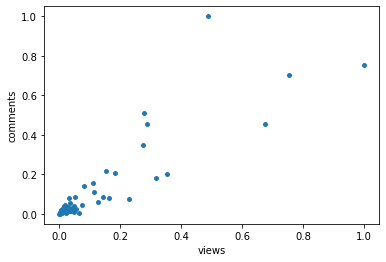

In [6]:
df = pd.DataFrame(new_df, columns = ['views','comment_count'])
df = df.iloc[:,[0,1]].values
plt.scatter(df[:,0], df[:,1],s=15)
plt.xlabel("views")
plt.ylabel("comments")

In [7]:
df = pd.DataFrame(new_df, columns = ['views','comment_count'])
df = df.iloc[:,[0,1]].values
kmeans3 = KMeans(n_clusters=3)
y_kmeans = kmeans3.fit_predict(df)
centroids = pd.DataFrame(kmeans3.cluster_centers_)

Text(0, 0.5, 'comments')

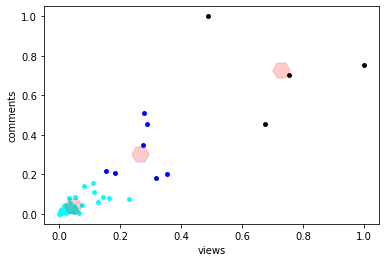

In [8]:
plt.scatter(df[np.where(y_kmeans == 0) ,0], df[np.where(y_kmeans == 0) ,1],s=15,c = 'cyan')
plt.scatter(df[np.where(y_kmeans == 1) ,0], df[np.where(y_kmeans == 1) ,1],s=15,c = 'black')
plt.scatter(df[np.where(y_kmeans == 2) ,0], df[np.where(y_kmeans == 2) ,1],s=15,c = 'blue')
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],c = 'red' ,s = 300,marker='H',edgecolors = 'face',alpha = .2)
plt.xlabel("views")
plt.ylabel("comments")


In [9]:
df = pd.DataFrame(new_df, columns = ['views','comment_count','category_id'])
df = df.iloc[:,[0,1,2]].values
kmeans3 = KMeans(n_clusters=3)
y_kmeans = kmeans3.fit_predict(df)
centroids = pd.DataFrame(kmeans3.cluster_centers_)

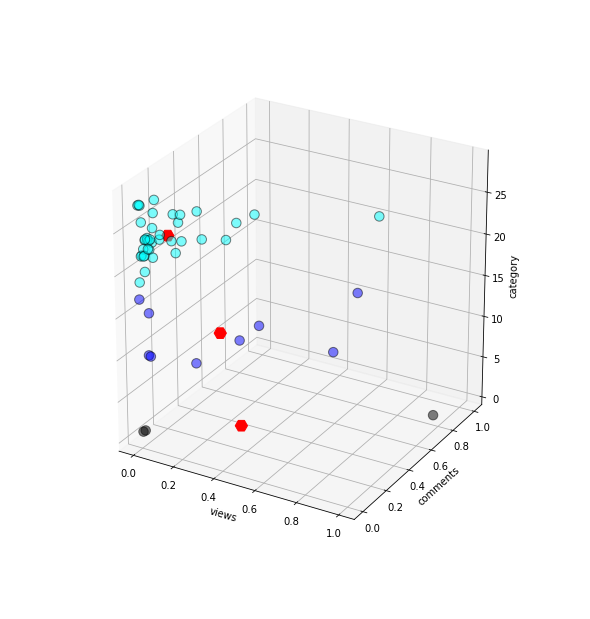

In [10]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(1, 3))
ax = Axes3D(fig, rect=[0, 0, 8, 2.8],elev=25)


ax.scatter(df[np.where(y_kmeans == 0) ,0], df[np.where(y_kmeans == 0) ,1], df[np.where(y_kmeans == 0) ,2],s=90,c = 'cyan',edgecolor='k',alpha =.5)
ax.scatter(df[np.where(y_kmeans == 1) ,0], df[np.where(y_kmeans == 1) ,1], df[np.where(y_kmeans == 1) ,2],s=90,c = 'black',edgecolor='k',alpha =.5)
ax.scatter(df[np.where(y_kmeans == 2) ,0], df[np.where(y_kmeans == 2) ,1], df[np.where(y_kmeans == 2) ,2],s=90,c = 'blue',edgecolor='k',alpha =.5)
ax.scatter(centroids.iloc[:,0],centroids.iloc[:,1],centroids.iloc[:,2],c = 'red' ,s = 150,marker='H',edgecolors = 'face',alpha = 1)


ax.set_xlabel('views')
ax.set_ylabel('comments')
ax.set_zlabel('category')
ax.set_title("")
ax.dist = 12

- Gower + Kmedoids
- GOwer + Hierarchy
- Gower + DBScan
- Entropy
- corel coef
- chi squ

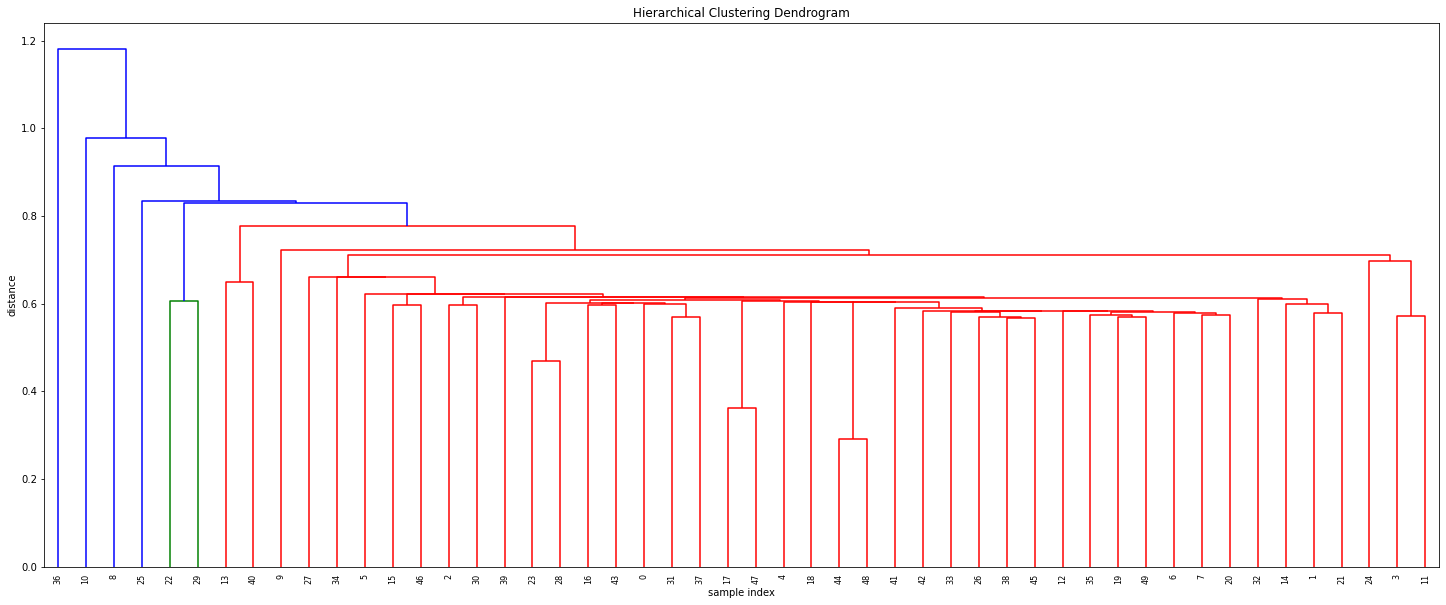

In [11]:
import gower
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dm = gower.gower_matrix(new_df)
Zd = linkage(dm) 
#cld = fcluster(Zd, 3, criterion='maxclust')
d = dendrogram(Zd)